In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import sys
sys.path.insert(0, '../utils')
import data_utils

sys.path.insert(0, '../models')
import log_reg_word_embeddings

In [3]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [4]:
df_train_x

,head.word,tail.word,sentence
0,Syracuse,Onondaga Lake,She also oversaw the refinancing of the state ...
1,Syracuse,Onondaga Lake,More than 2.5 million cubic yards of contamina...
2,Syracuse,Onondaga Lake,"The Onondaga Nation has about 1,500 members , ..."
3,Turkey,Adana,He was born in Istanbul but raised in the east...
4,Turkey,Adana,"By the end of his most recent tour , Rollins h..."
5,Queens,Belle Harbor,One was for St. Francis de Sales Roman Catholi...
6,Queens,Belle Harbor,"But instead there was a funeral , at St. Franc..."
7,Queens,Belle Harbor,"Rosemary Antonelle , the daughter of Teresa L...."
8,Queens,Belle Harbor,She is a daughter of Marion I. Rabbin and Dr. ...
9,Queens,Belle Harbor,"The firefighter , whom a Fire Department offic..."


In [5]:
model = log_reg_word_embeddings.LogRegWordEmbeddings()

In [6]:
model.fit(df_train_x, df_train_y)

Tokenizing sentences...
0    [she, also, oversaw, refinancing, state, super...
1    [more, 2, 5, million, cubic, yards, contaminat...
2    [the, onondaga, nation, 1, 500, members, feder...
3    [he, born, istanbul, raised, eastern, city, ad...
4    [by, end, recent, tour, rollins, met, soldiers...
Name: sentence, dtype: object
Averaging word embeddings...
0    [-0.024940285714285717, -0.014328357142857137,...
1    [0.022366650000000002, 0.060093550000000016, -...
2    [-0.02160072727272727, 0.10642886363636364, -0...
3    [0.012861874999999998, 0.0178651875, -0.102017...
4    [0.07083508108108107, 0.03429608108108108, -0....
Name: sentence, dtype: object
Shape of transformed input: (522517, 50)
Fitting label encoder...
['/broadcast/content/location' '/broadcast/producer/location'
 '/business/business_location/parent_company' '/business/company/advisors'
 '/business/company/founders' '/business/company/industry'
 '/business/company/locations' '/business/company/major_shareholders'
 '/bu

In [7]:
model.predict(df_train_x.head())

Tokenizing sentences...
0    [she, also, oversaw, refinancing, state, super...
1    [more, 2, 5, million, cubic, yards, contaminat...
2    [the, onondaga, nation, 1, 500, members, feder...
3    [he, born, istanbul, raised, eastern, city, ad...
4    [by, end, recent, tour, rollins, met, soldiers...
Name: sentence, dtype: object
Averaging word embeddings...
0    [-0.024940285714285717, -0.014328357142857137,...
1    [0.022366650000000002, 0.060093550000000016, -...
2    [-0.02160072727272727, 0.10642886363636364, -0...
3    [0.012861874999999998, 0.0178651875, -0.102017...
4    [0.07083508108108107, 0.03429608108108108, -0....
Name: sentence, dtype: object
Shape of transformed input: (5, 50)


array(['/location/us_county/county_seat',
       '/sports/sports_team_location/teams',
       '/location/location/contains', '/location/it_region/capital',
       '/location/country/capital'], dtype=object)

In [8]:
import pickle

save_dir = '../trained_models/log_reg_word_embeddings.pkl'
with open(save_dir, 'wb') as save_file:
    pickle.dump(model.model, save_file)

In [9]:
import pickle

save_dir = '../trained_models/log_reg_word_embeddings.pkl'

with open(save_dir, 'rb') as saved_file:
    loaded_model = pickle.load(saved_file)

In [10]:
loaded_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=6, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [11]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [12]:
predictions = model.predict(df_test_x)

Tokenizing sentences...
0    [the, little, comedy, mannered, operetta, base...
1    [a, court, rome, acquitted, five, people, accu...
2    [there, also, performers, born, louisiana, inc...
3    [when, julian, resuello, mayor, san, carlos, c...
4    [a3, concern, raised, libya, deal, alex, salmo...
Name: sentence, dtype: object
Averaging word embeddings...
0    [-0.04764994117647058, 0.043827, -0.0100119411...
1    [0.046854531250000005, -0.0070380000000000035,...
2    [0.02044745454545455, 0.013675363636363645, -0...
3    [0.10651433333333332, -0.028786888888888893, 0...
4    [0.0343515, -0.01823760714285715, 0.0274138928...
Name: sentence, dtype: object
Shape of transformed input: (172446, 50)


In [13]:
from collections import Counter
Counter(predictions)

predicted_labels = predictions
gold_labels = df_test_y

Counter(gold_labels)

Counter({'/broadcast/producer/location': 2376,
         '/location/it_region/capital': 1660,
         '/people/person/children': 23695,
         '/people/person/place_of_birth': 3583,
         '/people/ethnicity/geographic_distribution': 6357,
         '/people/person/nationality': 7176,
         '/people/person/ethnicity': 2856,
         '/people/ethnicity/people': 2876,
         '/business/company/major_shareholders': 1396,
         '/location/administrative_division/country': 9237,
         '/business/person/company': 4707,
         'NA': 13887,
         '/location/us_county/county_seat': 3759,
         '/people/person/profession': 2192,
         '/people/person/place_lived': 10463,
         '/location/us_state/capital': 9262,
         '/people/person/religion': 2725,
         '/business/company/founders': 5007,
         '/people/deceased_person/place_of_burial': 3607,
         '/people/deceased_person/place_of_death': 3179,
         '/location/country/capital': 8024,
         '/bus

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/country/languages_spoken': 3,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/compan

In [14]:
# Precision-Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import OneHotEncoder

combined_labels = np.append(df_test_y, [df_train_y]).reshape(-1, 1)

one_hot_encoder = OneHotEncoder()
one_hot_encoder.fit(combined_labels)

one_hot_encoded_gold_labels = one_hot_encoder.transform(df_test_y.values.reshape(-1, 1))
one_hot_encoded_gold_labels

one_hot_encoded_predicted_labels = one_hot_encoder.transform(predicted_labels.reshape(-1, 1))
one_hot_encoded_predicted_labels

precision, recall, threshold = precision_recall_curve(
    y_true=one_hot_encoded_gold_labels.reshape(-1, 1).toarray(),
    probas_pred=one_hot_encoded_predicted_labels.reshape(-1, 1).toarray(),
#     pos_label=1
)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

<172446x58 sparse matrix of type '<class 'numpy.float64'>'
	with 172446 stored elements in Compressed Sparse Row format>

<172446x58 sparse matrix of type '<class 'numpy.float64'>'
	with 172446 stored elements in Compressed Sparse Row format>

In [15]:
# Evaluation

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, average_precision_score

def compute_score(predicted_labels, gold_labels, labels, average='weighted'):
    accuracy = accuracy_score(gold_labels, predicted_labels)
    precision = precision_score(gold_labels, predicted_labels, average=average)
    recall = recall_score(gold_labels, predicted_labels, average=average)
    f1 = f1_score(gold_labels, predicted_labels, average=average)
    average_precision = average_precision_score(
        y_true=one_hot_encoded_gold_labels.toarray(),
        y_score=one_hot_encoded_predicted_labels.toarray(),
        average='micro'
    )

    return {
        'accuracy': accuracy,
        'precision': precision,
        'average_precision': average_precision,
        'recall': recall,
        'f1': f1
    }

compute_score(predicted_labels, gold_labels, labels=combined_labels)

/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 

{'accuracy': 0.08686777309998492,
 'precision': 0.9499928950752299,
 'average_precision': 0.023289669087833482,
 'recall': 0.08686777309998492,
 'f1': 0.1482642075372364}

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Precision-Recall curve')

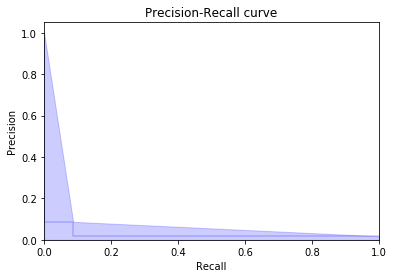

In [16]:
# Plot precision recall curve

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')

In [17]:
from sklearn.metrics import confusion_matrix

class_names = np.unique(combined_labels).ravel().tolist()

# Compute confusion matrix
cnf_matrix = confusion_matrix(
    y_true=gold_labels,
    y_pred=predicted_labels,
    labels=class_names
)
cnf_matrix

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,   790,  2322, ...,  5722,  1283, 13688]])

<Figure size 1800x1800 with 0 Axes>

Confusion matrix, without normalization
[[    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0   790  2322 ...  5722  1283 13688]]


<Figure size 1800x1800 with 0 Axes>

/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


Normalized confusion matrix
[[0.  0.  0.  ... 0.  0.  0. ]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0.1]]


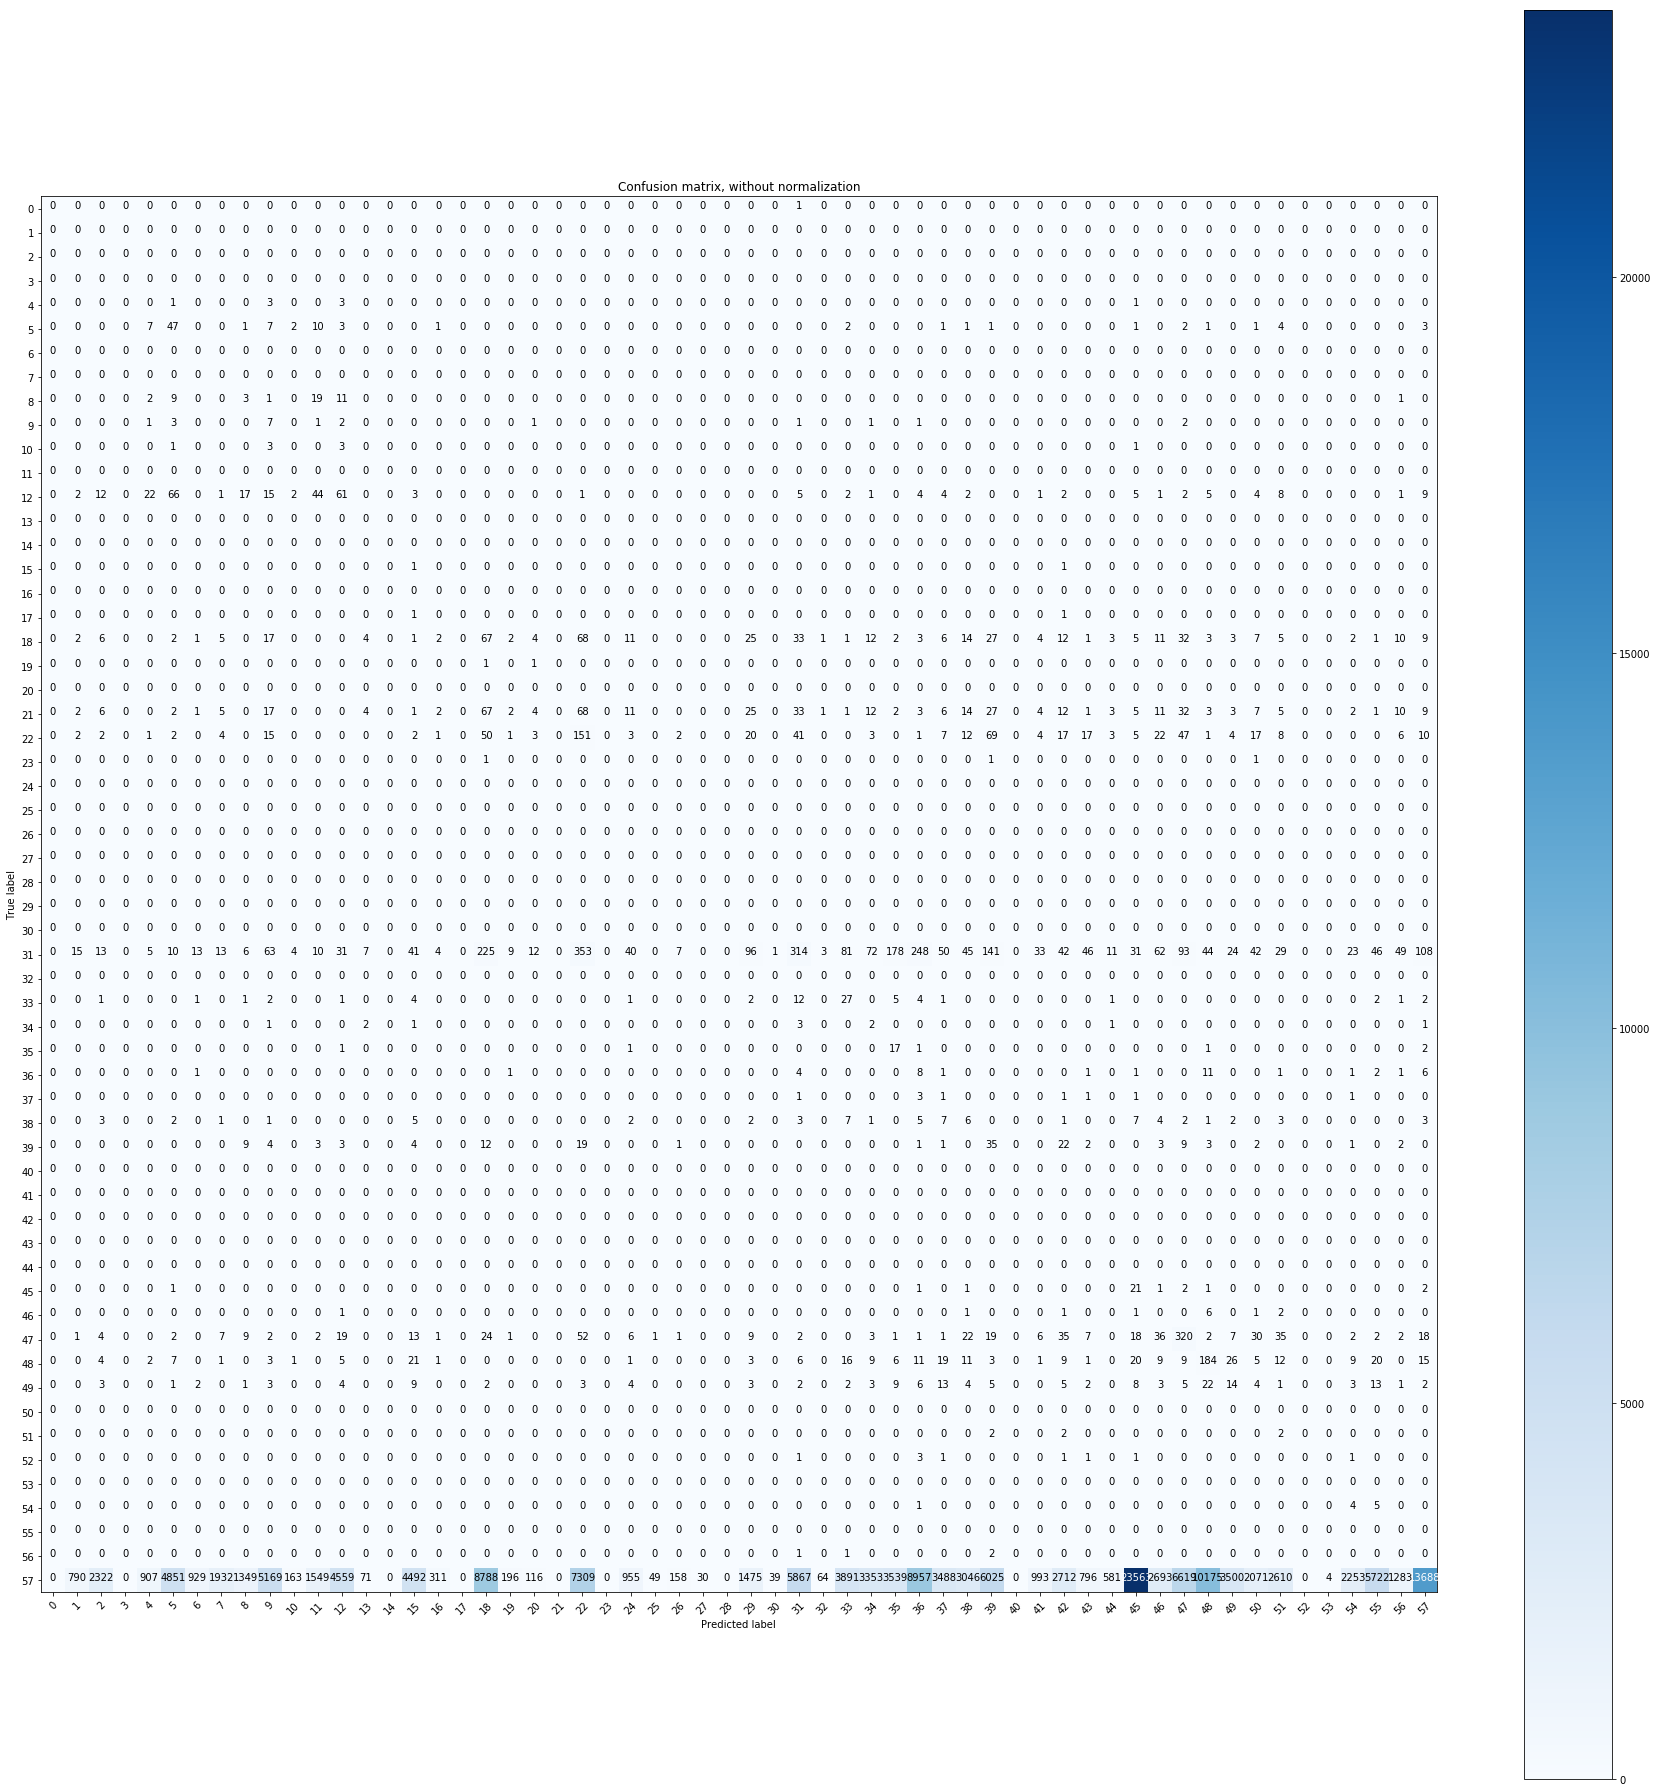

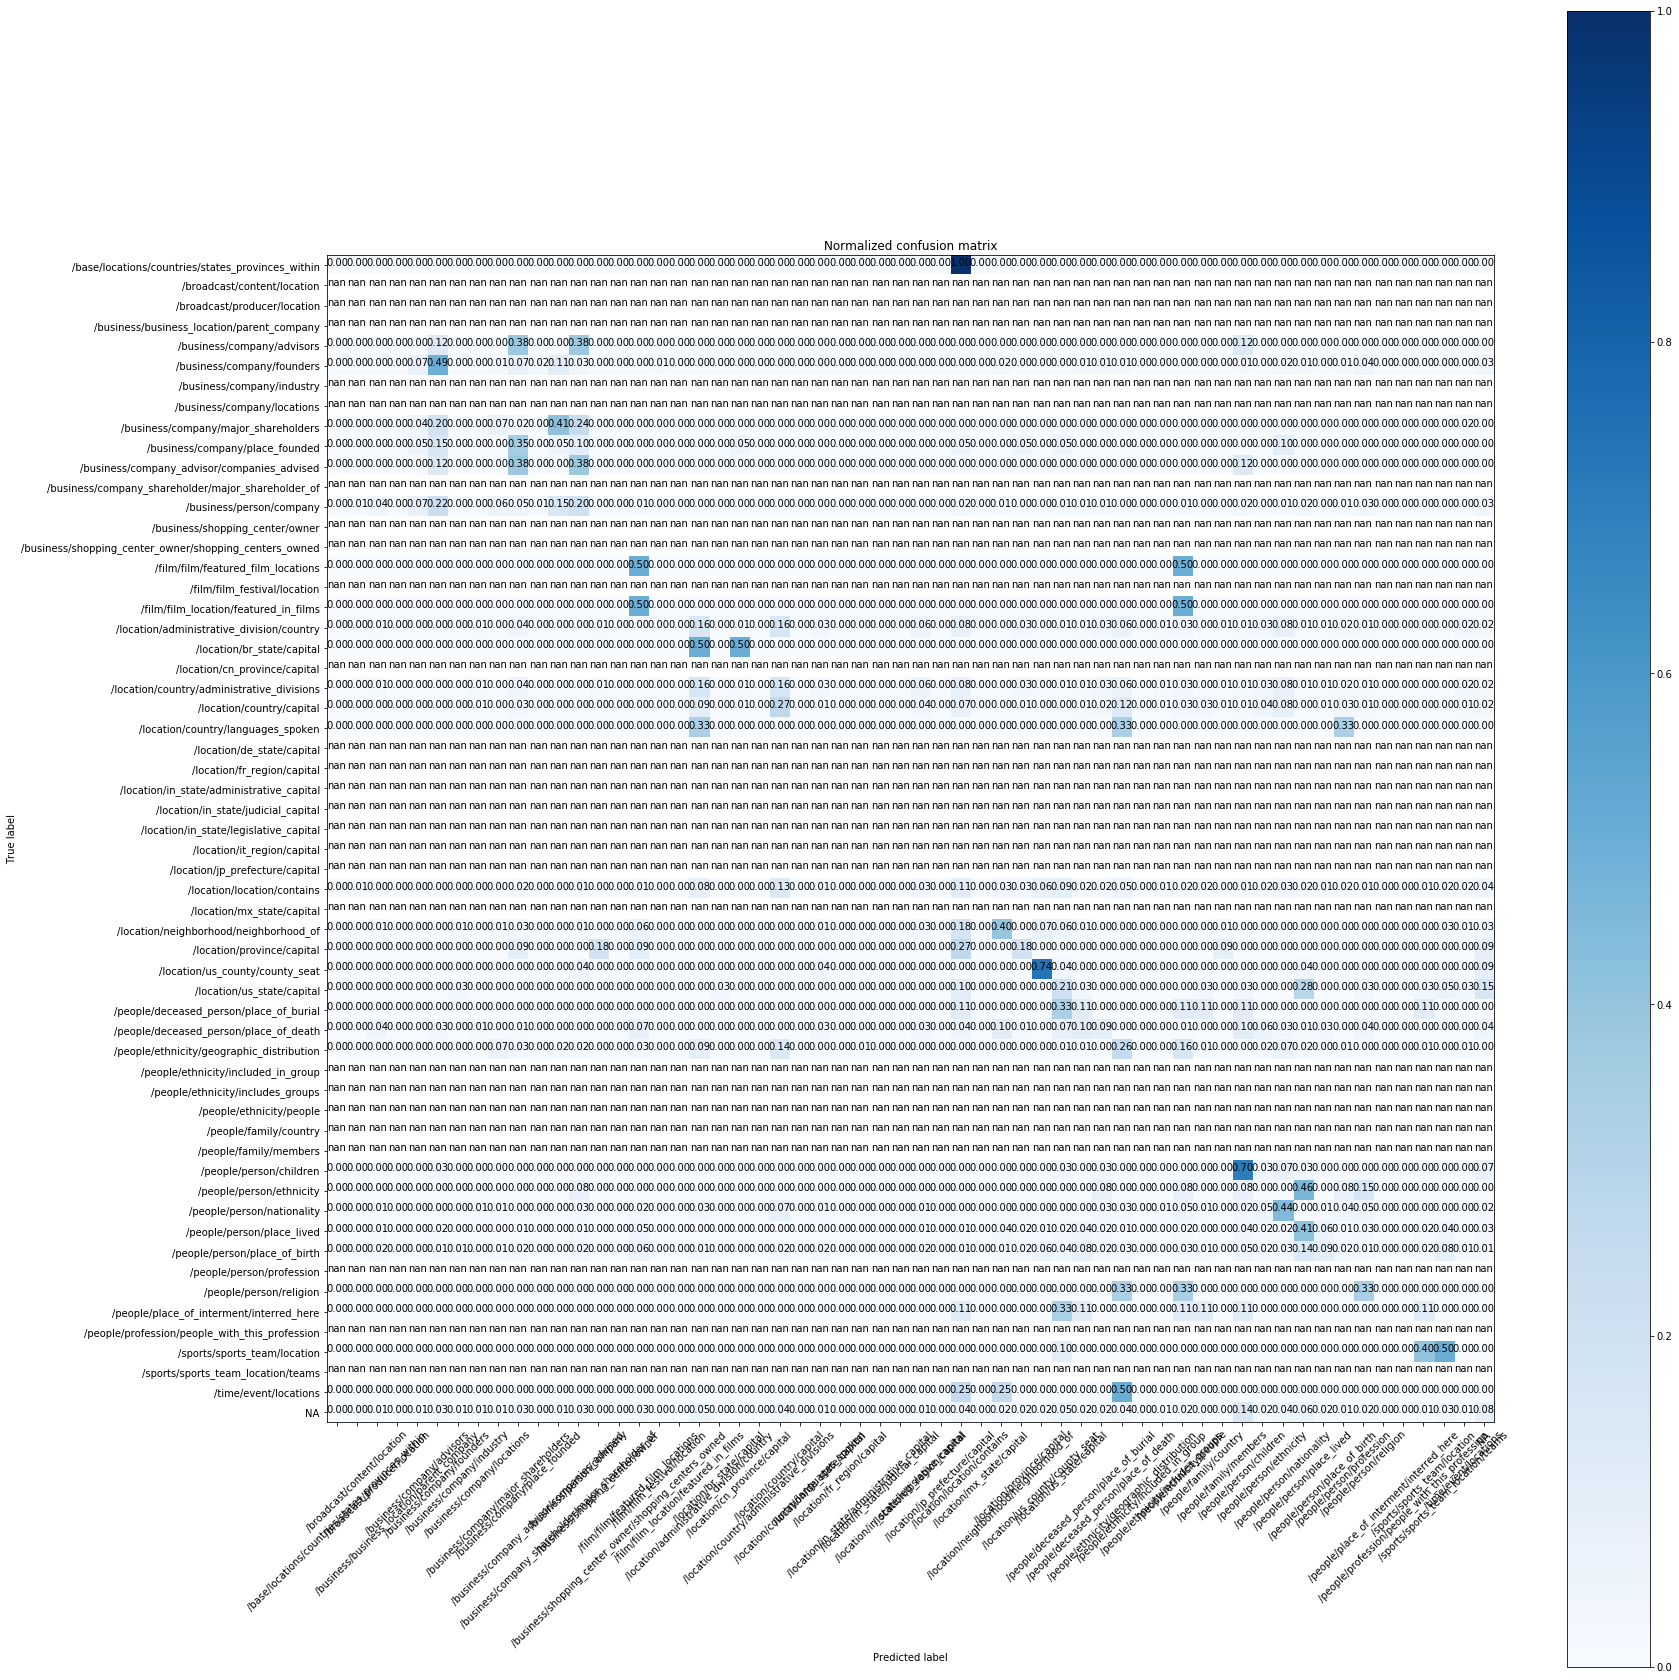

<module 'matplotlib.pyplot' from '/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


plt.rcParams["figure.figsize"] = (25, 25)
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=range(len(class_names)), #class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
plt

In [19]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(df_train_y), df_train_y)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1166.3325892857142,
 1: 131.4177565392354,
 2: 491.0874060150376,
 3: 1036.7400793650793,
 4: 10.35589424449025,
 5: 1866.1321428571428,
 6: 491.0874060150376,
 7: 28.44713632404181,
 8: 14.399167768959435,
 9: 4665.330357142857,
 10: 47.12454906204906,
 11: 1.2719003154696993,
 12: 9330.660714285714,
 13: 9330.660714285714,
 14: 518.3700396825396,
 15: 2332.6651785714284,
 16: 518.3700396825396,
 17: 1.2806287008352613,
 18: 2332.6651785714284,
 19: 4665.330357142857,
 20: 1.2806287008352613,
 21: 1.0503952171885302,
 22: 1332.9515306122448,
 23: 9330.660714285714,
 24: 2332.6651785714284,
 25: 3110.220238095238,
 26: 2332.6651785714284,
 27: 424.1209415584416,
 28: 4665.330357142857,
 29: 0.1398459362762206,
 30: 9330.660714285714,
 31: 1.0060011551790529,
 32: 239.24771062271063,
 33: 84.82418831168832,
 34: 11.692557286072324,
 35: 388.77752976190476,
 36: 3.8524610711336558,
 37: 108.49605481727575,
 38: 1332.9515306122448,
 39: 1332.9515306122448,
 40: 73.46976940382453,
 41: